The various features of the `Flight dataset` are explained below:
1) **Airline**: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) **Flight**: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) **Source City**: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) **Departure Time**: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) **Stops**: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) **Arrival Time**: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) **Destination City**: City where the flight will land. It is a categorical feature having 6 unique cities.
8) **Class**: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) **Duration**: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) **Days Left**: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) **Price**: Target variable stores information of the ticket price.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [31]:
data = pd.read_csv('Flight_Dataset.csv')
df = data.drop(['Unnamed: 0', 'flight'], axis=1)
df.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [32]:
df.shape

(300153, 10)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [34]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


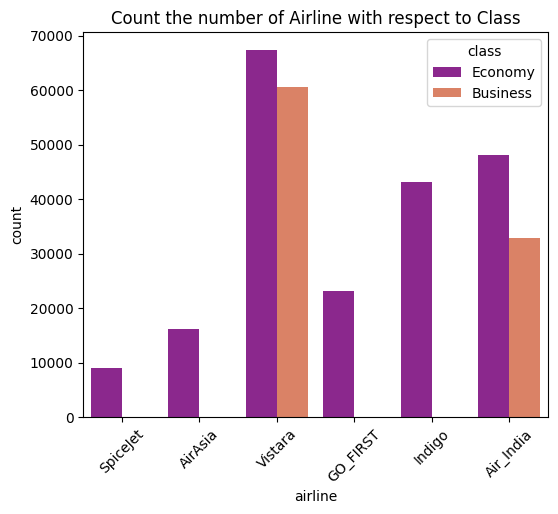

In [35]:
plt.figure(figsize=(6,5))
sns.countplot( data=df, x='airline',hue='class', palette='plasma')
plt.title('Count the number of Airline with respect to Class')
plt.xticks(rotation=45)
plt.show()

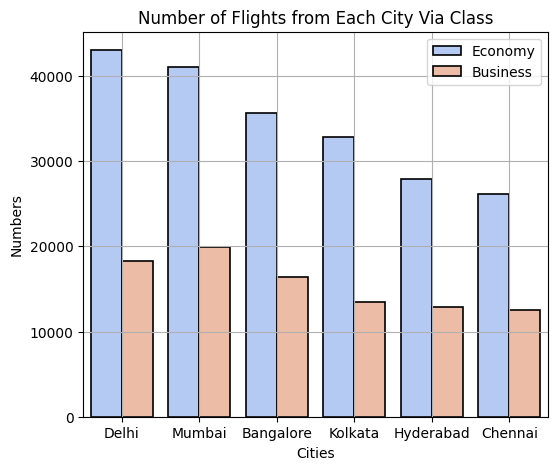

In [36]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='source_city', palette='coolwarm',  hue='class', edgecolor='black', linewidth=1.2)
plt.title('Number of Flights from Each City Via Class')
plt.xlabel('Cities')
plt.ylabel('Numbers')
plt.legend()
plt.grid()
plt.show()

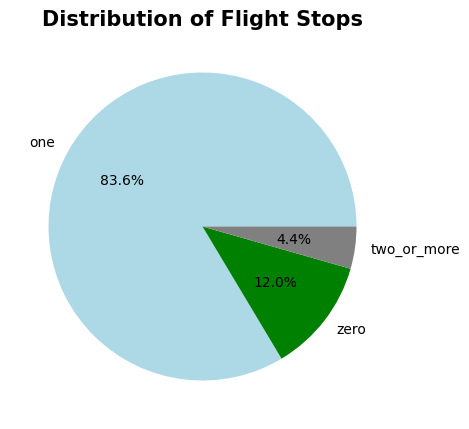

In [37]:
stops = df['stops'].value_counts()
labels = stops.index
colors = ['lightblue', 'green', 'gray']

plt.figure(figsize=(6,5))
plt.pie(stops , labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Flight Stops', fontsize=15, fontweight='bold')
plt.show()

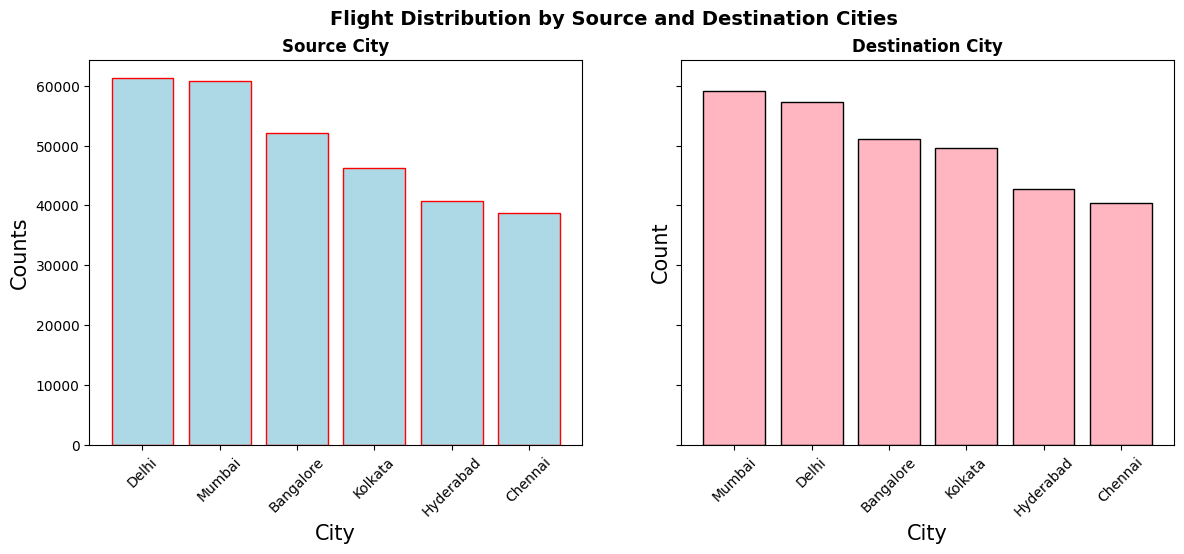

In [38]:
Source_City = df['source_city'].value_counts()
destination = df['destination_city'].value_counts()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5),  sharey=True)
fig.suptitle('Flight Distribution by Source and Destination Cities', fontsize=14, fontweight='bold')


ax[0].bar(Source_City.index, Source_City.values, color='lightblue', edgecolor='red')
ax[0].set_title('Source City', fontweight='bold')
ax[0].set_xlabel('City', fontsize=15)
ax[0].set_ylabel('Counts', fontsize=15)
ax[0].tick_params(axis='x', rotation=45)


ax[1].bar(destination.index, destination.values, color='lightpink', edgecolor='black')
ax[1].set_title('Destination City', fontweight='bold')
ax[1].set_xlabel('City', fontsize=15)
ax[1].set_ylabel('Count', fontsize=15)
ax[1].tick_params(axis='x', rotation=45)

plt.show()

In [39]:
print(f"Shape of data before removing outlier: {df.shape}")
print('-' * 35)
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

outliers = df[(df['duration'] < lower_limit) | (df['duration'] > upper_limit)]
print(f"Number of Outliers : {len(outliers)}")
print('-' * 35)

df = df[(df['duration'] >= lower_limit) & (df['duration'] <= upper_limit)]
print(f"Shape of data after removing outlier: {df.shape}")

Shape of data before removing outlier: (300153, 10)
-----------------------------------
Number of Outliers : 2110
-----------------------------------
Shape of data after removing outlier: (298043, 10)


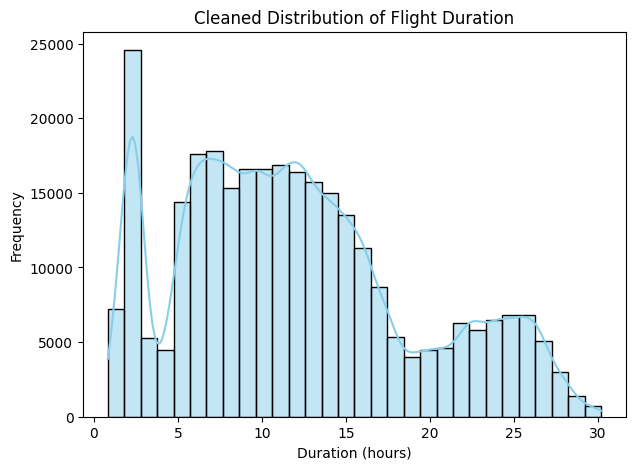

In [40]:
plt.figure(figsize=(7,5))
sns.histplot(df['duration'], bins=30, kde=True, color='skyblue')
plt.title('Cleaned Distribution of Flight Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()


In [41]:
print(f"Shape of data before removing outlier: {df.shape}")
print('-' * 35)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

outliers = df[(df['price'] < lower_limit) | (df['price'] > upper_limit)]
print(f"Number of Outliers : {len(outliers)}")
print('-' * 35)

df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]
print(f"Shape of data after removing outlier: {df.shape}")

Shape of data before removing outlier: (298043, 10)
-----------------------------------
Number of Outliers : 122
-----------------------------------
Shape of data after removing outlier: (297921, 10)


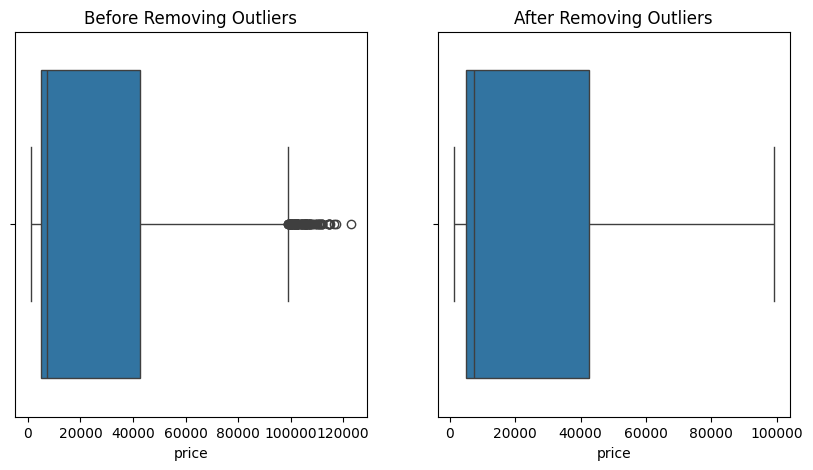

In [42]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.boxplot(x='price', data=data)
plt.title("Before Removing Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(x='price', data=df)
plt.title("After Removing Outliers")

plt.show()


In [43]:
df.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [44]:
X = df.drop('price', axis=1)
y = df['price']

In [45]:
numerical_cols = ['days_left', 'duration']
categorical_cols = ['airline', 'source_city', 'stops', 'destination_city', 'class',]
categorical_ordinals = ['departure_time', 'arrival_time']

In [46]:
time_order = [
    'Early_Morning',
    'Morning',
    'Afternoon',
    'Evening',
    'Night',
    'Late_Night'
    ]

preprocessing = ColumnTransformer([
    ('ord', OrdinalEncoder(categories=[time_order, time_order]), categorical_ordinals),
    ('cate', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [49]:
for name,model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessing),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{name} - r2_score : {r2:.3f}")
    print(f"{name} - MAE : {mae:.3f}")
    print('-' * 40)


LinearRegression - r2_score : 0.913
LinearRegression - MAE : 4551.239
----------------------------------------
DecisionTreeRegressor - r2_score : 0.978
DecisionTreeRegressor - MAE : 1130.964
----------------------------------------
RandomForestRegressor - r2_score : 0.986
RandomForestRegressor - MAE : 1062.216
----------------------------------------
GradientBoostingRegressor - r2_score : 0.953
GradientBoostingRegressor - MAE : 2940.631
----------------------------------------
KNeighborsRegressor - r2_score : 0.974
KNeighborsRegressor - MAE : 1773.521
----------------------------------------
XGBRegressor - r2_score : 0.977
XGBRegressor - MAE : 1971.685
----------------------------------------


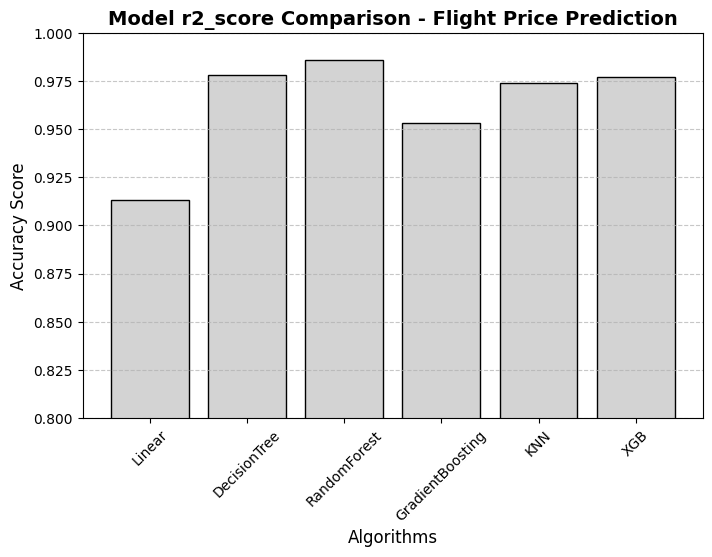

In [50]:
models = ['Linear', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'KNN', 'XGB']
r2_scores = [0.913, 0.978, 0.986, 0.953, 0.974, 0.977]

plt.figure(figsize=(8,5))
plt.bar(models, r2_scores, color='lightgray', edgecolor='black')
plt.title("Model r2_score Comparison - Flight Price Prediction", fontsize=14, fontweight='bold')
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0.8, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [51]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('model', RandomForestRegressor())
])


In [52]:
from sklearn.metrics import r2_score as r2

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

score = r2(y_test, y_pred)
print(f"r2_Score : {score}")


r2_Score : 0.9859591459486944


In [53]:
import joblib

# Save the trained pipeline
joblib.dump(pipeline, 'flight_price_prediction_model.pkl')
print("✅ Model saved successfully!")

✅ Model saved successfully!
